In [ ]:
install.packages("data.table")
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [ ]:
train <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv") %>%
 as_tibble() ## train 데이터 

In [ ]:
test <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv") %>%
 as_tibble() ## test 데이터 

#### **1. 로지스틱 회귀분석(Logistic Regression)**

In [ ]:
install.packages(c("tidyverse", "caret", "e1071", "Hmisc"))
options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’




In [ ]:
train %>% str()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
train %>% summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [ ]:
train$Survived %>% unique()
train$Pclass %>% unique()
train$Sex %>% unique()
train$Embarked %>% unique()

train <- select(train, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked"), factor)
summary(train)

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "S" "C" "Q" ""

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

In [ ]:
train <- train %>% na.omit()
summary(train)

 Survived     Pclass          Sex           Age            SibSp       
 0:424    Min.   :1.000   female:261   Min.   : 0.42   Min.   :0.0000  
 1:290    1st Qu.:1.000   male  :453   1st Qu.:20.12   1st Qu.:0.0000  
          Median :2.000                Median :28.00   Median :0.0000  
          Mean   :2.237                Mean   :29.70   Mean   :0.5126  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.0000  
          Max.   :3.000                Max.   :80.00   Max.   :5.0000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  8.05   C:130   
 Median :0.0000   Median : 15.74   Q: 28   
 Mean   :0.4314   Mean   : 34.69   S:554   
 3rd Qu.:1.0000   3rd Qu.: 33.38           
 Max.   :6.0000   Max.   :512.33           

In [ ]:
test %>% str()

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
test %>% summary()

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

In [ ]:
test$Pclass %>% unique()
test$Sex %>% unique()
test$Embarked %>% unique()

test <- select(test, -Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"), factor)
summary(test)

[1] 3 2 1

[1] "male"   "female"

[1] "Q" "S" "C"

  PassengerId         Pclass          Sex           Age            SibSp       
 Min.   : 892.0   Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000  
 1st Qu.: 996.2   1st Qu.:1.000   male  :266   1st Qu.:21.00   1st Qu.:0.0000  
 Median :1100.5   Median :3.000                Median :27.00   Median :0.0000  
 Mean   :1100.5   Mean   :2.266                Mean   :30.27   Mean   :0.4474  
 3rd Qu.:1204.8   3rd Qu.:3.000                3rd Qu.:39.00   3rd Qu.:1.0000  
 Max.   :1309.0   Max.   :3.000                Max.   :76.00   Max.   :8.0000  
                                               NA's   :86                      
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000   C:102   
 1st Qu.:0.0000   1st Qu.:  7.896   Q: 46   
 Median :0.0000   Median : 14.454   S:270   
 Mean   :0.3923   Mean   : 35.627           
 3rd Qu.:0.0000   3rd Qu.: 31.500           
 Max.   :9.0000   Max.   :512.329           
                  NA's   :1                 

In [ ]:
library(Hmisc)
test$Age <- impute(test$Age, median)
test$Fare <- impute(test$Fare, median)  
summary(test)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units





 86 values imputed to 27 


 1 values imputed to 14.4542 



  PassengerId         Pclass          Sex           Age            SibSp       
 Min.   : 892.0   Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000  
 1st Qu.: 996.2   1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000  
 Median :1100.5   Median :3.000                Median :27.00   Median :0.0000  
 Mean   :1100.5   Mean   :2.266                Mean   :29.60   Mean   :0.4474  
 3rd Qu.:1204.8   3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000  
 Max.   :1309.0   Max.   :3.000                Max.   :76.00   Max.   :8.0000  
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000   C:102   
 1st Qu.:0.0000   1st Qu.:  7.896   Q: 46   
 Median :0.0000   Median : 14.454   S:270   
 Mean   :0.3923   Mean   : 35.577           
 3rd Qu.:0.0000   3rd Qu.: 31.472           
 Max.   :9.0000   Max.   :512.329           

In [ ]:
m <- glm(Survived ~ ., data = train, family = "binomial")
summary(m)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7233  -0.6439  -0.3772   0.6288   2.4457  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.894850 607.855474   0.029  0.97651    
Pclass       -1.199251   0.164619  -7.285 3.22e-13 ***
Sexmale      -2.638476   0.222256 -11.871  < 2e-16 ***
Age          -0.043350   0.008232  -5.266 1.39e-07 ***
SibSp        -0.363208   0.129017  -2.815  0.00487 ** 
Parch        -0.060270   0.123900  -0.486  0.62666    
Fare          0.001432   0.002531   0.566  0.57165    
EmbarkedC   -12.257443 607.855250  -0.020  0.98391    
EmbarkedQ   -13.080988 607.855453  -0.022  0.98283    
EmbarkedS   -12.658656 607.855228  -0.021  0.98339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual devianc

In [ ]:
m2 <- step(m, direction = "backward")

Start:  AIC=652.34
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  3   635.81 649.81
- Parch     1   632.58 650.58
- Fare      1   632.68 650.68
<none>          632.34 652.34
- SibSp     1   640.91 658.91
- Age       1   662.75 680.75
- Pclass    1   686.64 704.64
- Sex       1   808.42 826.42

Step:  AIC=649.81
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Parch   1   636.07 648.07
- Fare    1   636.62 648.62
<none>        635.81 649.81
- SibSp   1   645.25 657.25
- Age     1   667.62 679.62
- Pclass  1   695.26 707.26
- Sex     1   815.18 827.18

Step:  AIC=648.07
Survived ~ Pclass + Sex + Age + SibSp + Fare

         Df Deviance    AIC
- Fare    1   636.72 646.72
<none>        636.07 648.07
- SibSp   1   647.23 657.23
- Age     1   667.86 677.86
- Pclass  1   699.21 709.21
- Sex     1   820.07 830.07

Step:  AIC=646.72
Survived ~ Pclass + Sex + Age + SibSp

         Df Deviance    AIC
<n

In [ ]:
summary(m2)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7714  -0.6445  -0.3836   0.6276   2.4585  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.600846   0.543441  10.306  < 2e-16 ***
Pclass      -1.317398   0.140900  -9.350  < 2e-16 ***
Sexmale     -2.623483   0.214524 -12.229  < 2e-16 ***
Age         -0.044385   0.008155  -5.442 5.26e-08 ***
SibSp       -0.376119   0.121080  -3.106  0.00189 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 636.72  on 709  degrees of freedom
AIC: 646.72

Number of Fisher Scoring iterations: 5


In [ ]:
test %>% show()

# A tibble: 418 × 8
   PassengerId Pclass Sex      Age SibSp Parch  Fare Embarked
         <int>  <int> <fct>  <dbl> <int> <int> <dbl> <fct>   
 1         892      3 male    34.5     0     0  7.83 Q       
 2         893      3 female  47       1     0  7    S       
 3         894      2 male    62       0     0  9.69 Q       
 4         895      3 male    27       0     0  8.66 S       
 5         896      3 female  22       1     1 12.3  S       
 6         897      3 male    14       0     0  9.22 S       
 7         898      3 female  30       0     0  7.63 Q       
 8         899      2 male    26       1     1 29    S       
 9         900      3 female  18       0     0  7.23 C       
10         901      3 male    21       2     0 24.2  S       
# … with 408 more rows


In [ ]:
predict(m2, newdata = test, type = "response") %>%
  tibble(predict_survived = .) %>% bind_cols(test, .)

PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict_survived
<int>,<int>,<fct>,<impute>,<int>,<int>,<impute>,<fct>,<dbl>
892,3,male,34.5,0,0,7.8292,Q,0.07543138
893,3,female,47.0,1,0,7.0000,S,0.30713487
894,2,male,62.0,0,0,9.6875,Q,0.08246739
895,3,male,27.0,0,0,8.6625,S,0.10218138
896,3,female,22.0,1,1,12.2875,S,0.57348133
897,3,male,14.0,0,0,9.2250,S,0.16851095
898,3,female,30.0,0,0,7.6292,Q,0.57861996
899,2,male,26.0,1,1,29.0000,S,0.23369652
900,3,female,18.0,0,0,7.2292,C,0.70050991


In [ ]:
predict_value <- predict(m2, test, type = "response") %>% tibble(Survived = .)
predict_cutoff <- test %>% select(PassengerId) %>% dplyr::bind_cols(.,predict_value) %>%
  mutate(Survived = ifelse(Survived >= 0.5, 1, 0))

In [ ]:
predict_cutoff %>% show()

# A tibble: 418 × 2
   PassengerId Survived
         <int>    <dbl>
 1         892        0
 2         893        0
 3         894        0
 4         895        0
 5         896        1
 6         897        0
 7         898        1
 8         899        0
 9         900        1
10         901        0
# … with 408 more rows


In [ ]:
predict_cutoff %>% write_csv(file = "submission.csv")

#### **2. 의사결정트리(Decision Tree)**

In [ ]:
train %>% show()
test %>% show()

# A tibble: 714 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0             3 male      22     1     0  7.25 S       
 2 1             1 female    38     1     0 71.3  C       
 3 1             3 female    26     0     0  7.92 S       
 4 1             1 female    35     1     0 53.1  S       
 5 0             3 male      35     0     0  8.05 S       
 6 0             1 male      54     0     0 51.9  S       
 7 0             3 male       2     3     1 21.1  S       
 8 1             3 female    27     0     2 11.1  S       
 9 1             2 female    14     1     0 30.1  C       
10 1             3 female     4     1     1 16.7  S       
# … with 704 more rows
# A tibble: 418 × 8
   PassengerId Pclass Sex      Age SibSp Parch  Fare Embarked
         <int>  <int> <fct>  <dbl> <int> <int> <dbl> <fct>   
 1         892      3 male    34.5     0     0  7.83 Q       
 2         893      3 female  47       1   

In [ ]:
library(rpart)
Survived_detection <- rpart(formula = Survived ~ ., data = train, method = "class")

In [ ]:
summary(Survived_detection)

Call:
rpart(formula = Survived ~ ., data = train, method = "class")
  n= 714 

          CP nsplit rel error    xerror       xstd
1 0.45862069      0 1.0000000 1.0000000 0.04525169
2 0.02931034      1 0.5413793 0.5413793 0.03816193
3 0.02758621      3 0.4827586 0.5482759 0.03833522
4 0.02413793      4 0.4551724 0.5172414 0.03753514
5 0.01034483      5 0.4310345 0.5000000 0.03706748
6 0.01000000      9 0.3896552 0.5103448 0.03735012

Variable importance
     Sex     Fare   Pclass      Age    Parch    SibSp Embarked 
      44       15       15       10        7        6        3 

Node number 1: 714 observations,    complexity param=0.4586207
  predicted class=0  expected loss=0.4061625  P(node) =1
    class counts:   424   290
   probabilities: 0.594 0.406 
  left son=2 (453 obs) right son=3 (261 obs)
  Primary splits:
      Sex      splits as  RL,           improve=99.998170, (0 missing)
      Pclass   < 2.5      to the right, improve=39.252560, (0 missing)
      Fare     < 52.2771  to

In [ ]:
install.packages(c("rattle", "rpart.plot"))

library(rattle)
library(rpart.plot)
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



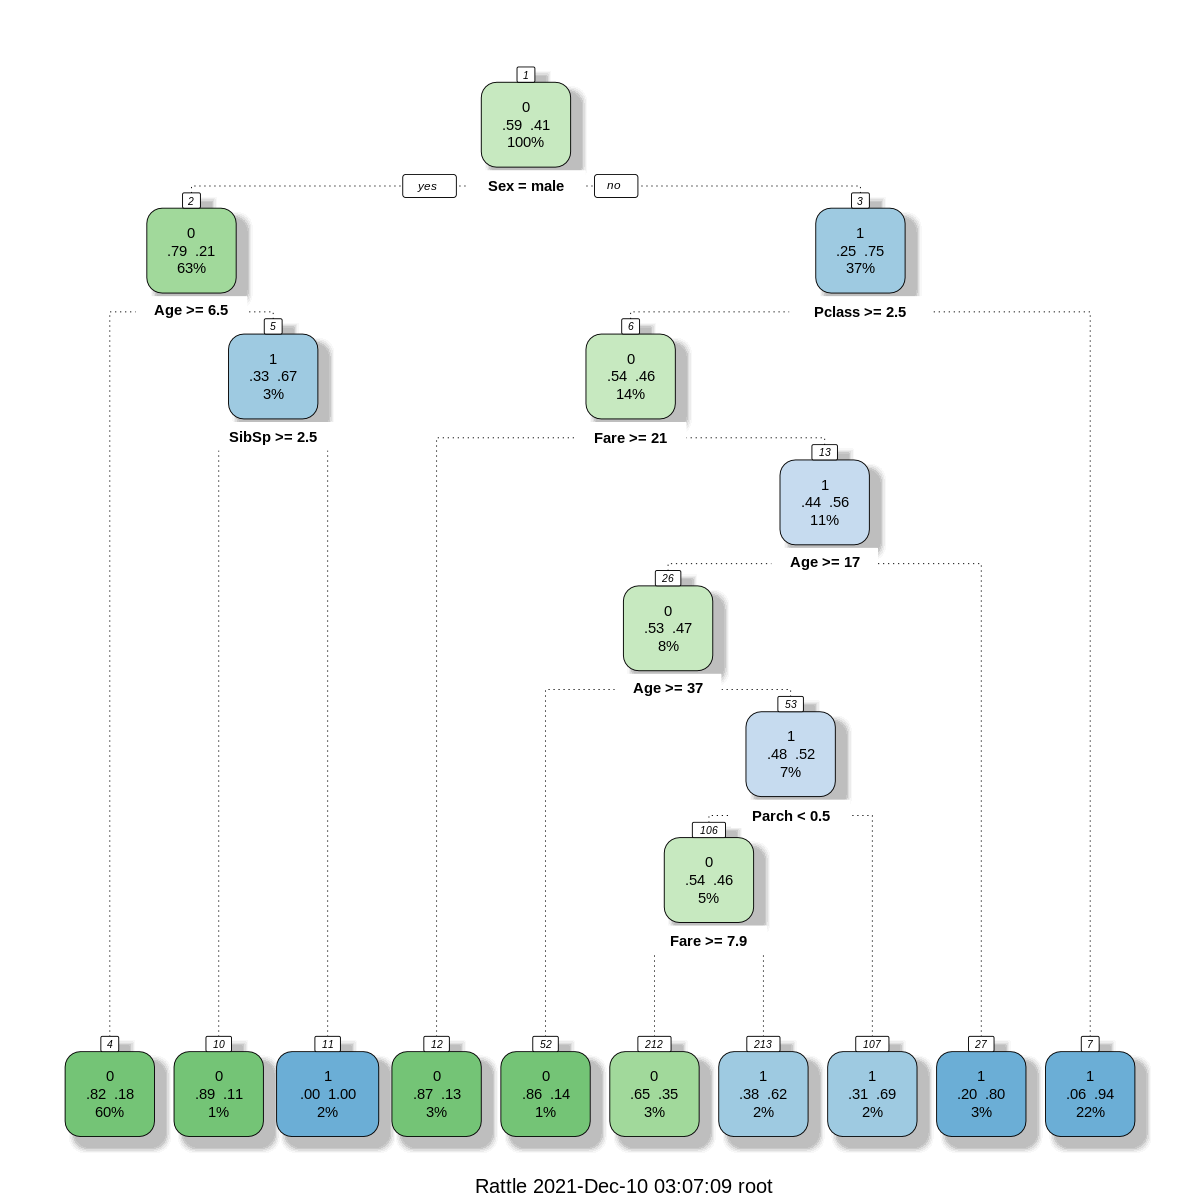

In [ ]:
fancyRpartPlot(Survived_detection)

In [ ]:
rpart::printcp(Survived_detection)


Classification tree:
rpart(formula = Survived ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] Age    Fare   Parch  Pclass Sex    SibSp 

Root node error: 290/714 = 0.40616

n= 714 

        CP nsplit rel error  xerror     xstd
1 0.458621      0   1.00000 1.00000 0.045252
2 0.029310      1   0.54138 0.54138 0.038162
3 0.027586      3   0.48276 0.54828 0.038335
4 0.024138      4   0.45517 0.51724 0.037535
5 0.010345      5   0.43103 0.50000 0.037067
6 0.010000      9   0.38966 0.51034 0.037350


In [ ]:
Survived_detection$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror))

min_xerror_cp <- Survived_detection$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror)) %>% pull(CP)

CP,nsplit,rel error,xerror,xstd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01034483,5,0.4310345,0.5,0.03706748


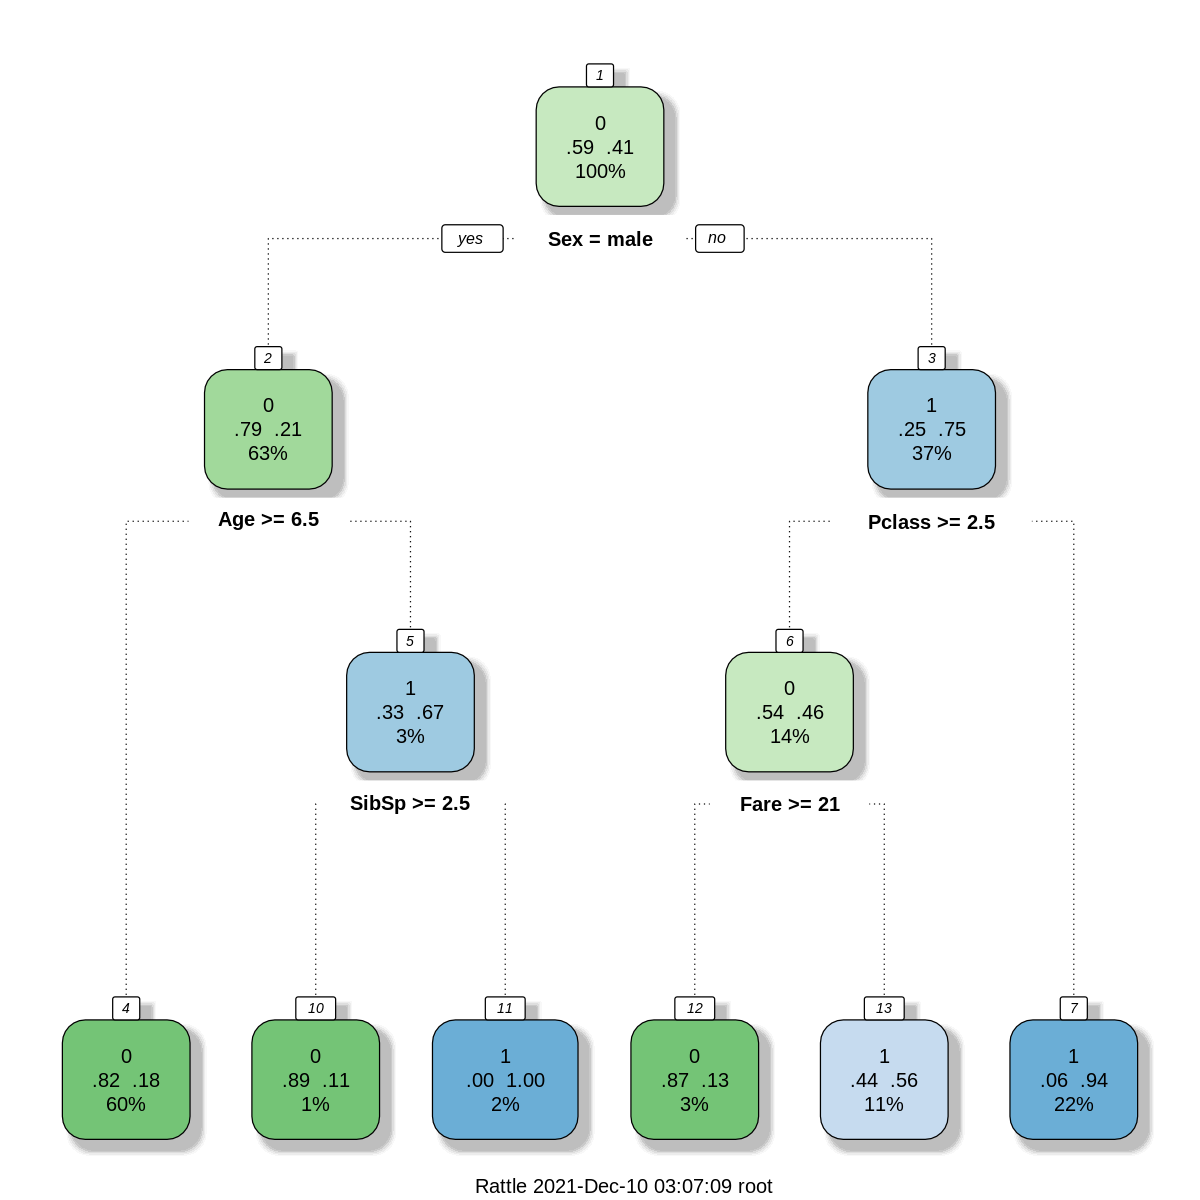

In [ ]:
Survived_detection_pr <- rpart::prune(Survived_detection, cp = min_xerror_cp)

fancyRpartPlot(Survived_detection_pr)

In [ ]:
predict_value2 <- predict(Survived_detection_pr, test, type = "class") %>% tibble(Survived = .)
predict_cutoff2 <- test %>% select(PassengerId) %>% dplyr::bind_cols(.,predict_value2)

In [ ]:
predict_cutoff2 %>% show()

# A tibble: 418 × 2
   PassengerId Survived
         <int> <fct>   
 1         892 0       
 2         893 1       
 3         894 0       
 4         895 0       
 5         896 1       
 6         897 0       
 7         898 1       
 8         899 0       
 9         900 1       
10         901 0       
# … with 408 more rows


In [ ]:
predict_cutoff2 %>% write_csv(file = "submission2.csv")

#### **3. 랜덤포레스트(Randomforest)**

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:rattle’:

    importance


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
summary(train)

 Survived     Pclass          Sex           Age            SibSp       
 0:424    Min.   :1.000   female:261   Min.   : 0.42   Min.   :0.0000  
 1:290    1st Qu.:1.000   male  :453   1st Qu.:20.12   1st Qu.:0.0000  
          Median :2.000                Median :28.00   Median :0.0000  
          Mean   :2.237                Mean   :29.70   Mean   :0.5126  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.0000  
          Max.   :3.000                Max.   :80.00   Max.   :5.0000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  8.05   C:130   
 Median :0.0000   Median : 15.74   Q: 28   
 Mean   :0.4314   Mean   : 34.69   S:554   
 3rd Qu.:1.0000   3rd Qu.: 33.38           
 Max.   :6.0000   Max.   :512.33           

In [ ]:
mtry_sqrt <- train %>% select(-Survived) %>% colnames() %>%
 length() %>% sqrt() %>% floor()

mtry_sqrt

[1] 2

In [ ]:
set.seed(1)
Survived_RF <- randomForest(Survived ~ ., data = train, importance = T, mtry = mtry_sqrt, ntree = 1000)
Survived_RF


Call:
 randomForest(formula = Survived ~ ., data = train, importance = T,      mtry = mtry_sqrt, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.49%
Confusion matrix:
    0   1 class.error
0 386  38  0.08962264
1  94 196  0.32413793

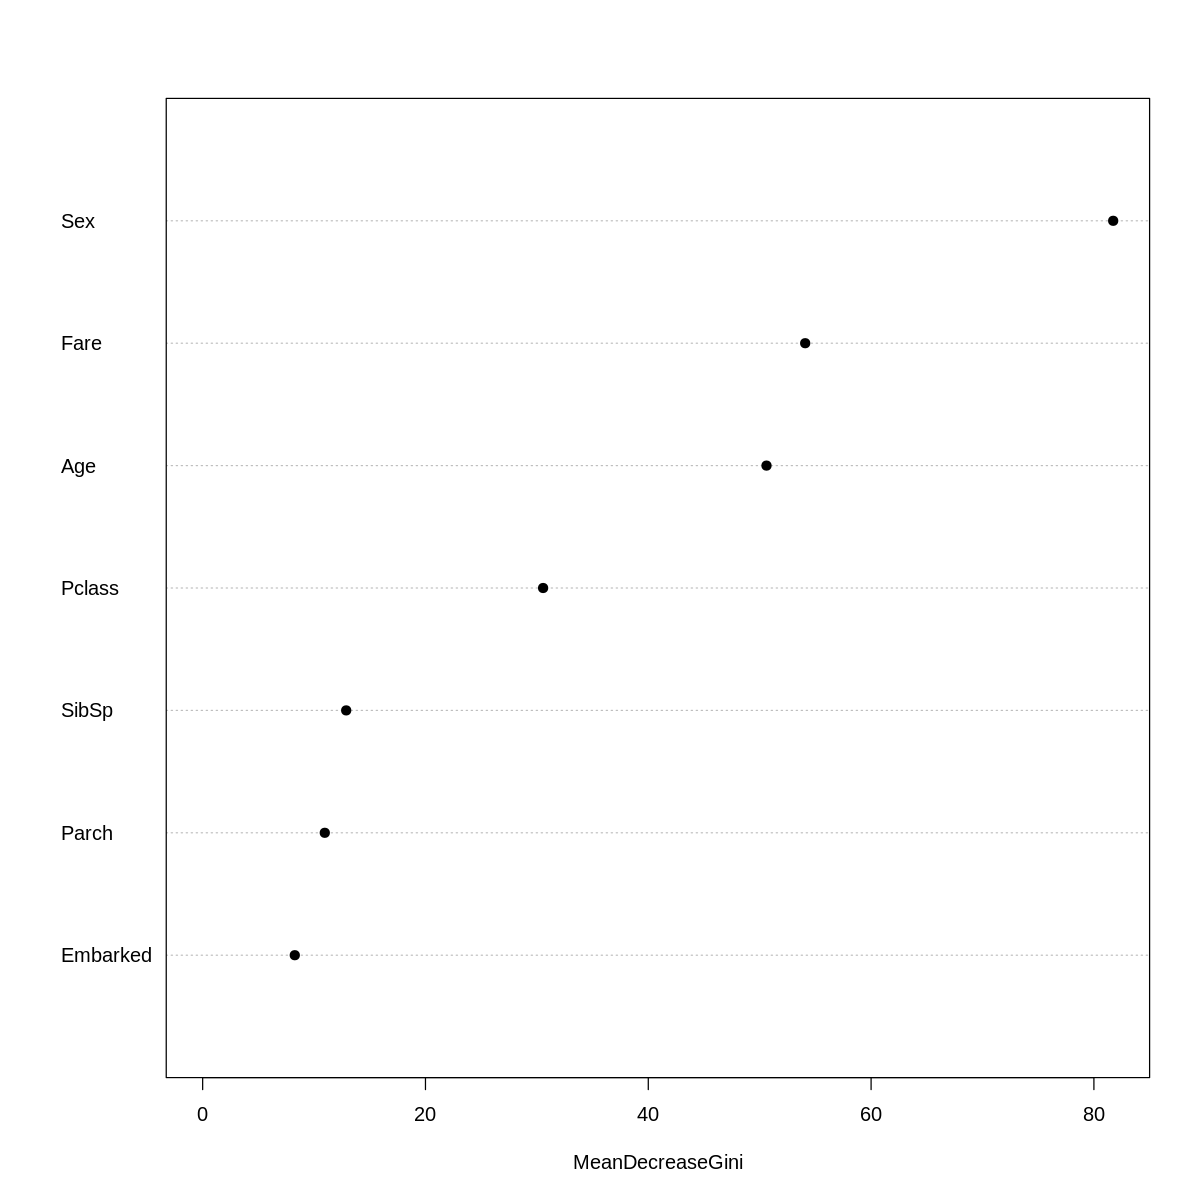

In [ ]:
varImpPlot(Survived_RF, type=2, pch=19, col=1, cex=1, main="")

In [ ]:
set.seed(1)
Survived_RF <- randomForest(Survived ~ Sex + Fare + Age + Pclass, 
                         data = train, importance = T, mtry = mtry_sqrt, ntree = 500)
Survived_RF


Call:
 randomForest(formula = Survived ~ Sex + Fare + Age + Pclass,      data = train, importance = T, mtry = mtry_sqrt, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 16.53%
Confusion matrix:
    0   1 class.error
0 390  34  0.08018868
1  84 206  0.28965517

In [ ]:
predict_value3 <- predict(Survived_RF, test, type = "class") %>% tibble(Survived = .)
predict_cutoff3 <- test %>% select(PassengerId) %>% dplyr::bind_cols(.,predict_value3)

In [ ]:
predict_cutoff3 %>% write_csv(file = "submission3.csv")

#### **4. SVM(Support Vector Machine)**

In [ ]:
Survived_svm <- e1071::svm(formula = Survived ~ ., data = train, type = "C-classification", kernel = "radial")
summary(Survived_svm)


Call:
svm(formula = Survived ~ ., data = train, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  338

 ( 169 169 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
tuned <- e1071::tune.svm(Survived ~ ., data = train, gamma = 10^(-8:1), cost = 1:30)

In [ ]:
tune_summary <- summary(tuned)
tune_summary


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    2

- best performance: 0.1766236 

- Detailed performance results:
    gamma cost     error dispersion
1   1e-08    1 0.4061815 0.04541190
2   1e-07    1 0.4061815 0.04541190
3   1e-06    1 0.4061815 0.04541190
4   1e-05    1 0.4061815 0.04541190
5   1e-04    1 0.4061815 0.04541190
6   1e-03    1 0.3082942 0.05345449
7   1e-02    1 0.2172535 0.05208100
8   1e-01    1 0.1835681 0.03634688
9   1e+00    1 0.2019171 0.05339884
10  1e+01    1 0.2789319 0.04039771
11  1e-08    2 0.4061815 0.04541190
12  1e-07    2 0.4061815 0.04541190
13  1e-06    2 0.4061815 0.04541190
14  1e-05    2 0.4061815 0.04541190
15  1e-04    2 0.4061815 0.04541190
16  1e-03    2 0.2115610 0.04647369
17  1e-02    2 0.2144562 0.04710821
18  1e-01    2 0.1766236 0.04400896
19  1e+00    2 0.2004695 0.04325937
20  1e+01    2 0.2831182 0.03994519
21  1e-08    3 0.4061815 0.04541190
22  1e-07    3 0.4061815 

In [ ]:
best_parameter <- tune_summary$best.parameters
best_parameter

,gamma,cost
,<dbl>,<int>
18,0.1,2


In [ ]:
svm_Survived_tune <- e1071::svm(Survived ~ -Embarked, data = train, type = "C-classification", kernel = "radial",
 gamma = best_parameter[1,1], cost = best_parameter[1,2])

In [ ]:
summary(svm_Survived_tune)


Call:
svm(formula = Survived ~ -Embarked, data = train, type = "C-classification", 
    kernel = "radial", gamma = best_parameter[1, 1], cost = best_parameter[1, 
        2])


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  2 

Number of Support Vectors:  580

 ( 290 290 )


Number of Classes:  2 

Levels: 
 0 1




In [ ]:
predict_value4 <- predict(svm_Survived_tune, test) %>% tibble(Survived = .)
predict_cutoff4 <- test %>% select(PassengerId) %>% dplyr::bind_cols(.,predict_value4)

In [ ]:
predict_cutoff4 %>% write_csv(file = "submission4.csv")

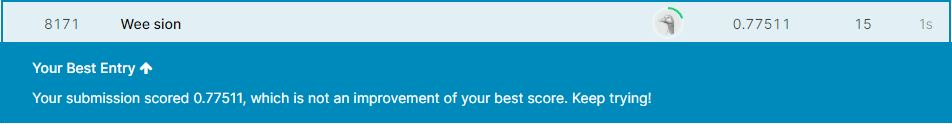